In [1]:
# 读取文件中的字符串
# splitlines(): 自动去掉换行傅号
words = open('../makemore/names.txt', 'r').read().splitlines()

In [2]:
print(words[:5])

['emma', 'olivia', 'ava', 'isabella', 'sophia']


In [3]:
# 查看名字的数量
print(len(words))
# 查看没有重复的名字的数量
print(len(set(words)))

32033
29494


In [4]:
# 查看字符最短名字的长度
min(len(w) for w in words)

2

In [5]:
# 查看最短名字数量
len([w for w in words if len(w) == 2])

65

In [6]:
# 查看字符最长名字的长度
max(len(w) for w in words)

15

In [7]:
# 查看最长名字
[w for w in words if len(w) == 15]

['muhammadibrahim', 'muhammadmustafa']

In [8]:
# 统计二元词出现的数量
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram,0) + 1

In [9]:
# 对二元统计的词进行排序
# 按照 第二个 元素的大小进行从大到小排序
sorted(b.items(), key = lambda kv: -kv[1])
# sorted(b.items(), key = lambda kv: kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [10]:
# 导入torch库
import torch

/opt/conda/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
# 使用张量
N = torch.zeros((27,27), dtype=torch.int32)
# print(N)

In [12]:
#用来将字符转换成对应的数字以便表示其位置信息
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [13]:
# 统计其不同位置信息的数量
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

(-0.5, 26.5, 26.5, -0.5)

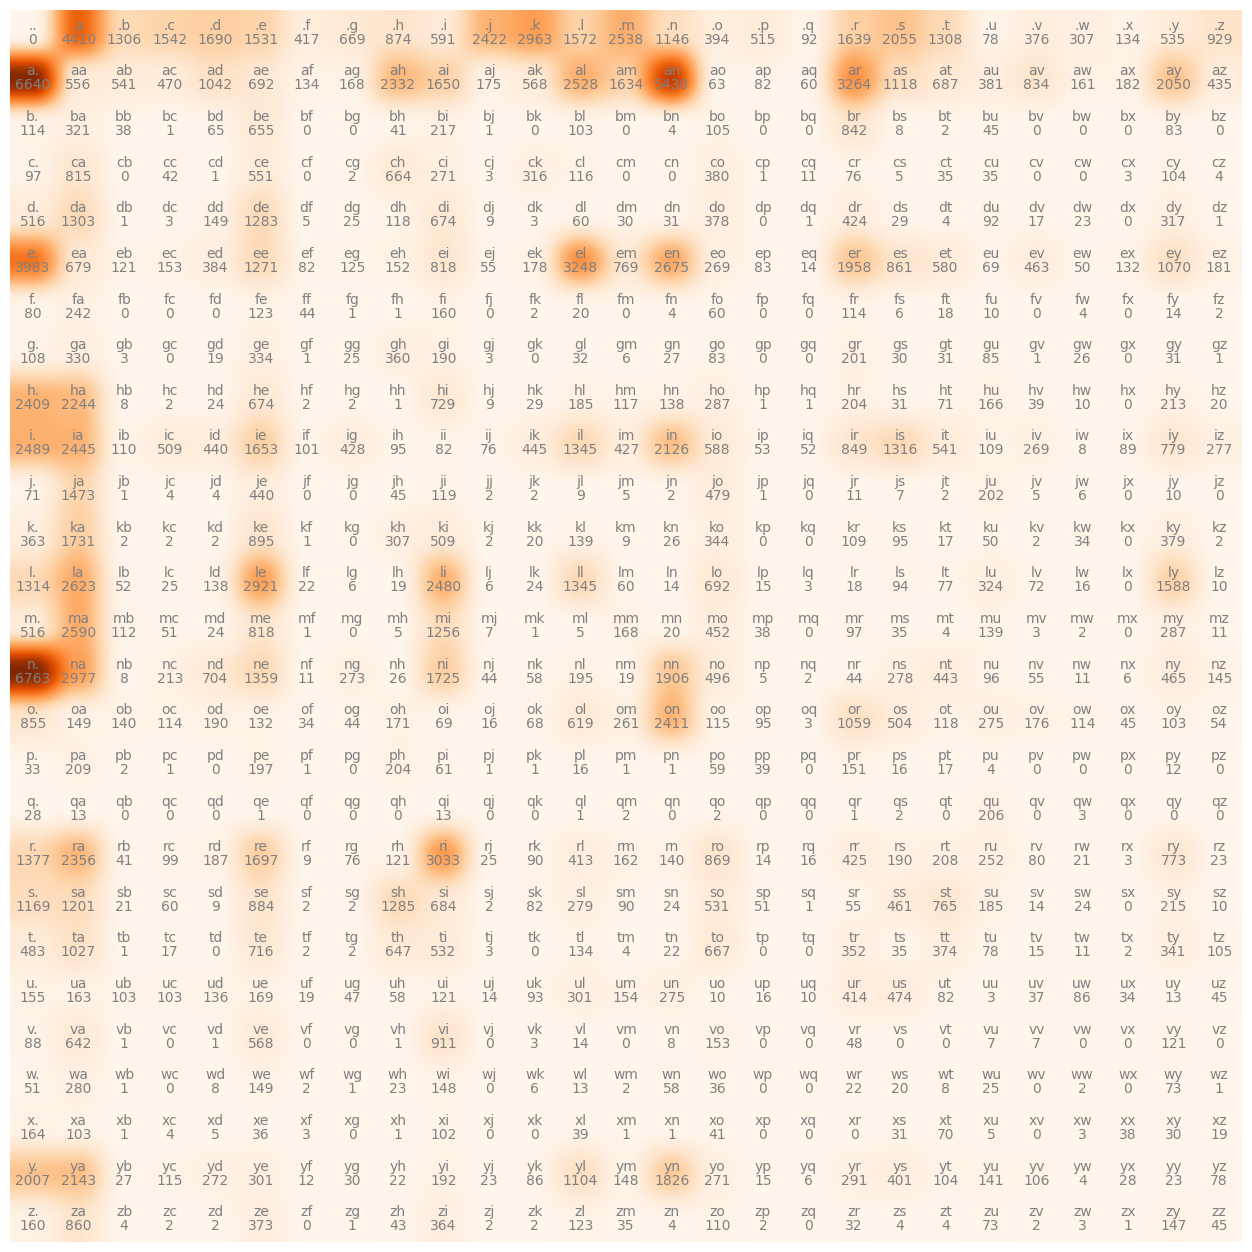

In [15]:
import matplotlib.pyplot as plt
# %matplotlib inline可以省下plt.show()
%matplotlib inline

plt.figure(figsize=(16,16))
# 绘制一个热力图，数值越大颜色越深
# N: 表示一个二维数组
# cmap: 指定颜色
#interpolation: 控制热图的显示形式
plt.imshow(N, cmap='Oranges', interpolation='hanning')
for i in range(27):
    for j in range(27):
        chstr = itos[i]  + itos[j]
        #将text绘制在图片上面
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color="gray")
plt.axis('off')    

In [16]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [54]:
# 转换成相关的概率值
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [53]:
# 设置随机种子，方便可以复现相关的代码
g = torch.Generator().manual_seed(2147483647)
# 根据p的权重来采样相关的数值，权重高的被抽取的概率大
ix = torch.multinomial(p, num_samples=10, replacement=True, generator=g)
ix
# itos[ix]

tensor([1, 1, 1, 0, 0, 2, 2, 0, 1, 1])

In [41]:
# 一个使用案例
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
torch.multinomial(p, num_samples=100, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

In [57]:
P = N
P.shape

torch.Size([27, 27])

In [60]:
# pytorch计算行的累加和
# pytorch =0 计算列的累加和
P.sum(1, keepdim=True).shape
# 27, 27
# 27,  1

torch.Size([27, 1])

In [59]:
# 这里要注意广播机制，如果没有设置keepdim可能会导致，结果不是想要实现的样子
P.sum(1).shape
# 27, 27
#  1, 27

torch.Size([27])

In [74]:
P = (N+1).float()
P /= P.sum(1, keepdim=True)

In [78]:
g = torch.Generator().manual_seed(2147483647)

for i in range(10):
    out = []
    ix = 0
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        # 表示取了终止符号，则表示取完了，所以想需要重新开始取
        if ix == 0:
            break

    print(''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.
odaren.
iaddash.
h.
jhinatien.
egushl.
